This notebook is similar to [plot_results.ipynb](./plot_results.ipynb), except that it uses the [matplotlib basemap](https://matplotlib.org/basemap/) module to generate the plots. Hence all the details concerning the netCDF reading will not be repeated here.     
The [PyCall](https://github.com/JuliaPy/PyCall.jl) module allows us to call Python directly from Julia, in this case for loading basemap.

In [1]:
using NetCDF  
using PyPlot
using PyCall
@pyimport mpl_toolkits.basemap as basemap

INFO: Recompiling stale cache file /home/ctroupin/.julia/v0.6/lib/v0.6/NetCDF.ji for module NetCDF.
INFO: Recompiling stale cache file /home/ctroupin/.julia/v0.6/lib/v0.6/PyPlot.ji for module PyPlot.


# Data reading

In [2]:
datadir = "./"
datafile = joinpath(datadir, "Water_body_Salinity.4Danl.nc")
if isfile(datafile)
    info("File exist") 
else
    error("File does not exist")
end

INFO: File exist


## NetCDF reading

In [3]:
function read_results_file(ncfile)
    """
    read_results_file(ncfile)

    Load the coordinates and the interpolated field
    contained in the file *ncfile*
    
    """
    
    nc = NetCDF.open(ncfile);
    lon = ncread(datafile, "lon");
    lat = ncread(datafile, "lat");
    depth = ncread(datafile, "depth");
    time = ncread(datafile, "time");
    salinity = ncread(datafile, "Salinity");
    NetCDF.close(nc);
    return lon, lat, depth, time, salinity
end;

In [11]:
lon, lat, depth, time, salinity = read_results_file(datafile);

## Depth and period selection

In [60]:
depthplot = 20.;
timeplot = 34195.0;
timeindex = find(time .== timeplot);
depthindex = find(depth .== depthplot);
salinityplot = salinity[:, :, depthindex, timeindex];
salinityplot = squeeze(salinityplot, (3, 4));

# Creation of plots
## Setup map projection
We setup a Mercator projection on the region defined by longitude and latitude.

In [24]:
map = basemap.Basemap(llcrnrlon=minimum(lon), llcrnrlat=minimum(lat),
    urcrnrlon=maximum(lon), urcrnrlat=maximum(lat),
    resolution="i", projection="merc")

PyObject <mpl_toolkits.basemap.Basemap object at 0x7fd06bea4750>

To check if everything is ok so far, let's represent the coastline and the land-sea mask.     
You should obtain a map centered on the Black Sea.

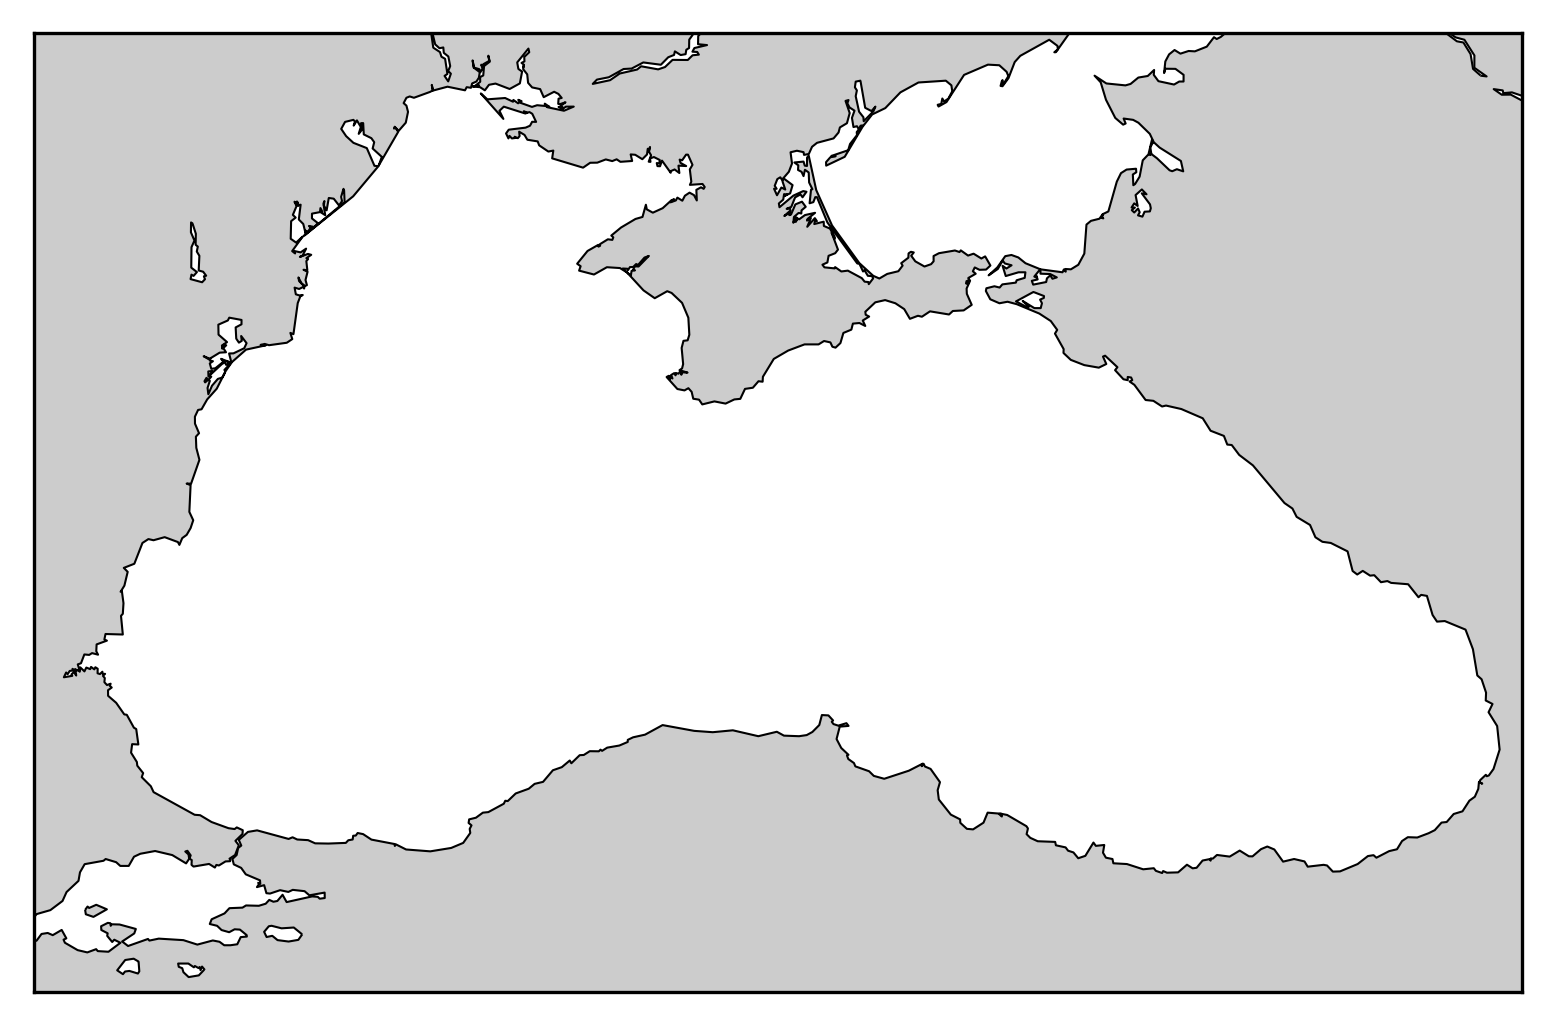

In [26]:
map[:drawcoastlines](linewidth=0.5);
map[:fillcontinents]();

## Add salinity pseudo-color plot

In [36]:
longrid, latgrid = repmat(lon', length(lat), 1), repmat(lat, 1, length(lon));

In [63]:
maxval = maximum(salinityplot);
salinityplot[salinityplot .== maxval] = NaN;

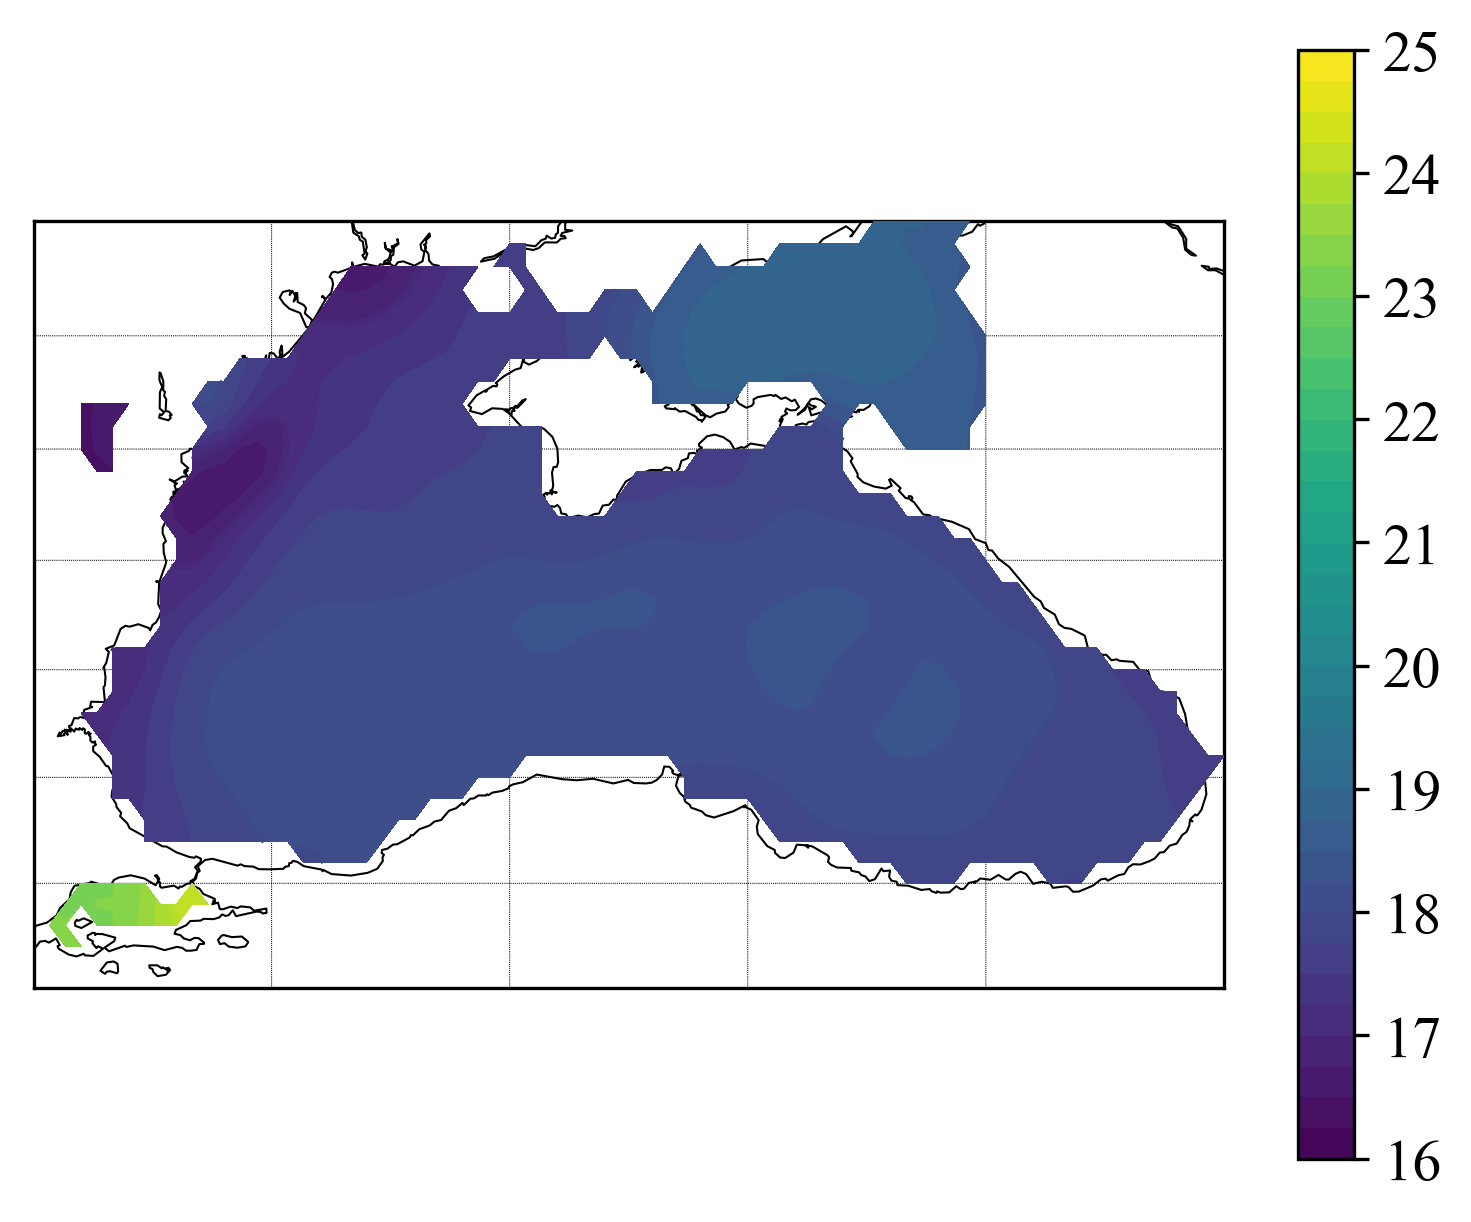

In [73]:
x, y = map(longrid, latgrid)
map[:contourf](x, y, transpose(salinityplot), levels=collect(16:0.25:25), zorder=3);
map[:drawcoastlines](linewidth=0.5);
# Draw lat/lon grid lines every 30 degrees.
map[:drawmeridians](collect(27:3:42), linewidth=.25)
map[:drawparallels](collect(40:1:48), linewidth=.25)
colorbar()
map[:contour](x, y, transpose(salinityplot), levels=collect(16:1:25), linecolors="k", zorder=4);

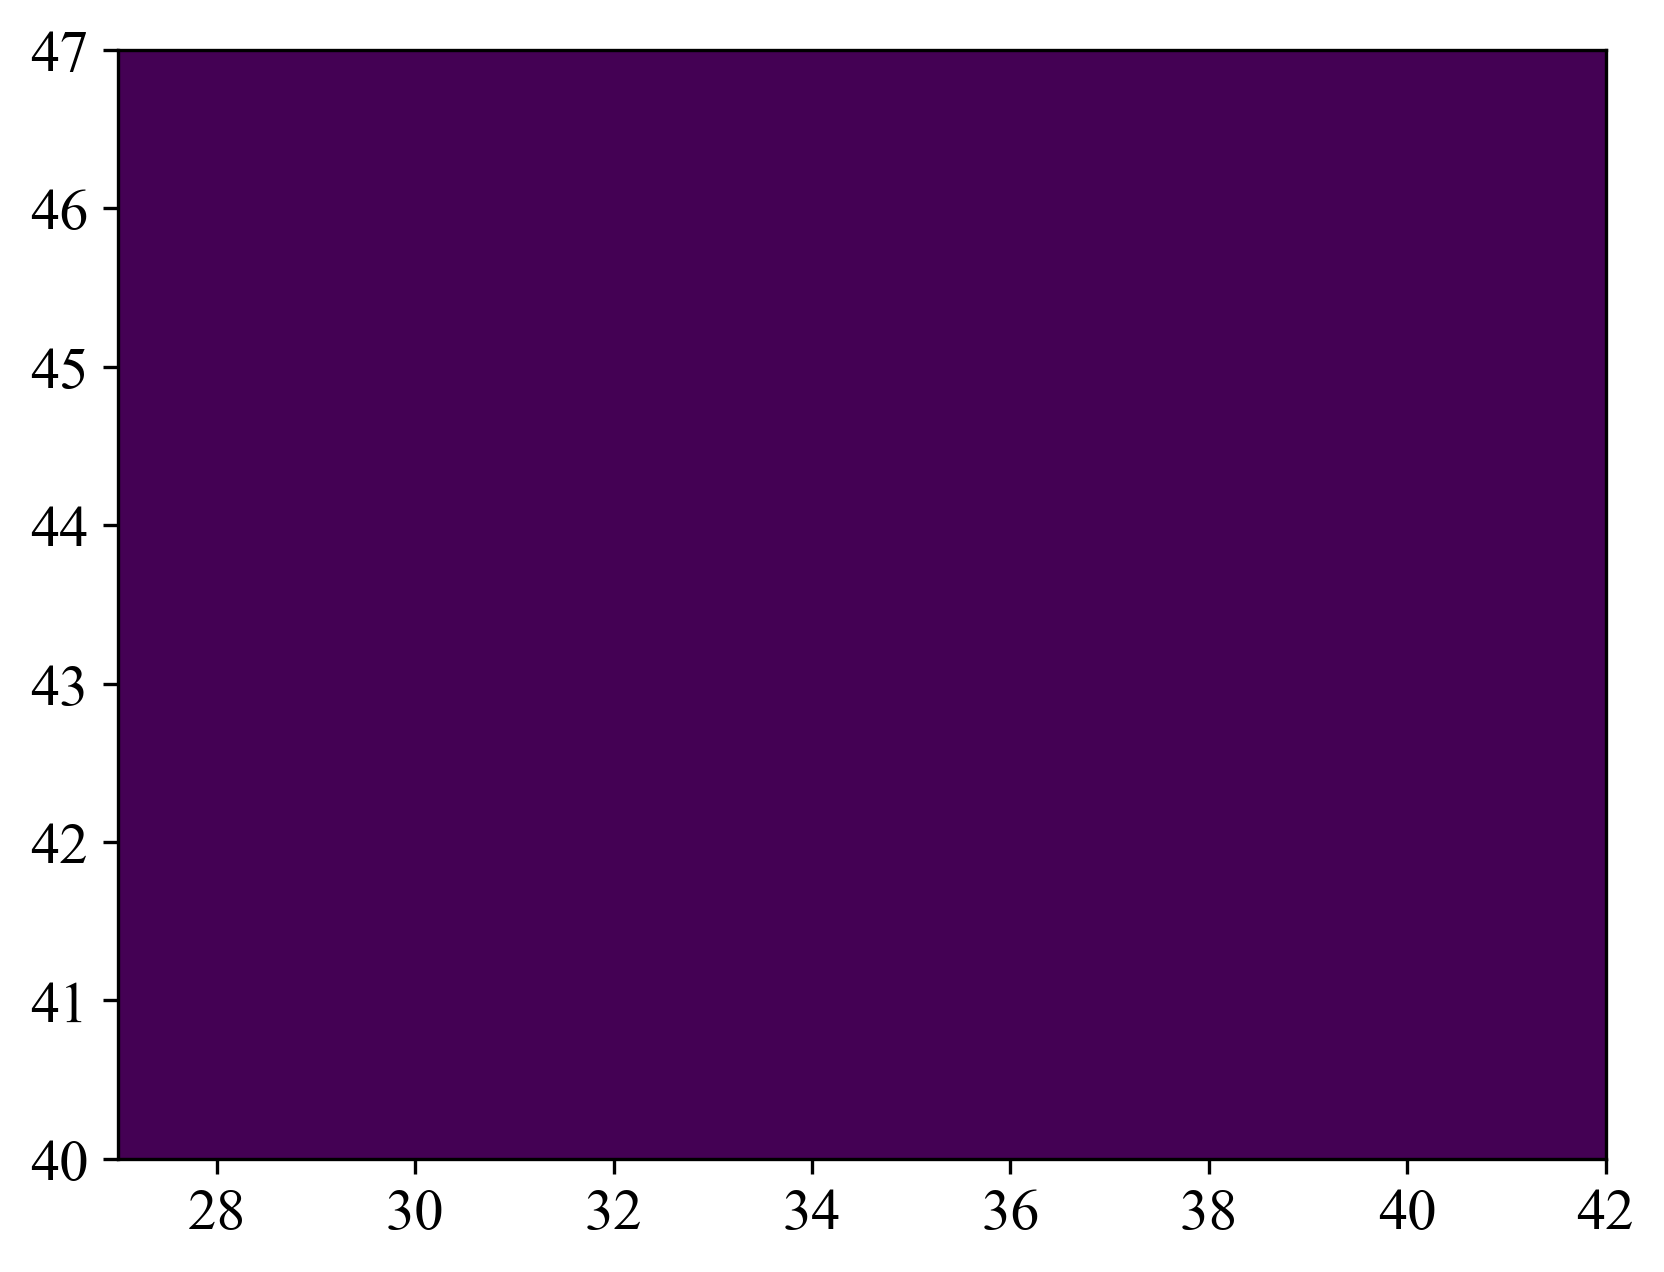

PyObject <matplotlib.collections.QuadMesh object at 0x7fd0678999d0>

In [65]:
pcolormesh(lon, lat, transpose(salinityplot))

In [66]:
salinityplot

76×36 Array{Float32,2}:
 NaN32  NaN32  NaN32       NaN32       …  NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.2747     NaN32       NaN32       NaN32     
 NaN32  NaN32     23.3271     23.2628     NaN32       NaN32       NaN32     
 NaN32  NaN32     23.2908  NaN32          NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.2154     NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.2454  …  NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.3818     NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.5857     NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.8262     NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32          23.9942     NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32       NaN32       …  NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32       NaN32          NaN32       NaN32       NaN32     
 NaN32  NaN32  NaN32       NaN32          NaN32     